In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
train = pd.read_csv('Stores.csv')

In [5]:
train

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [7]:
train.drop(train.columns[[0]], axis = 1, inplace = True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [11]:
train.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


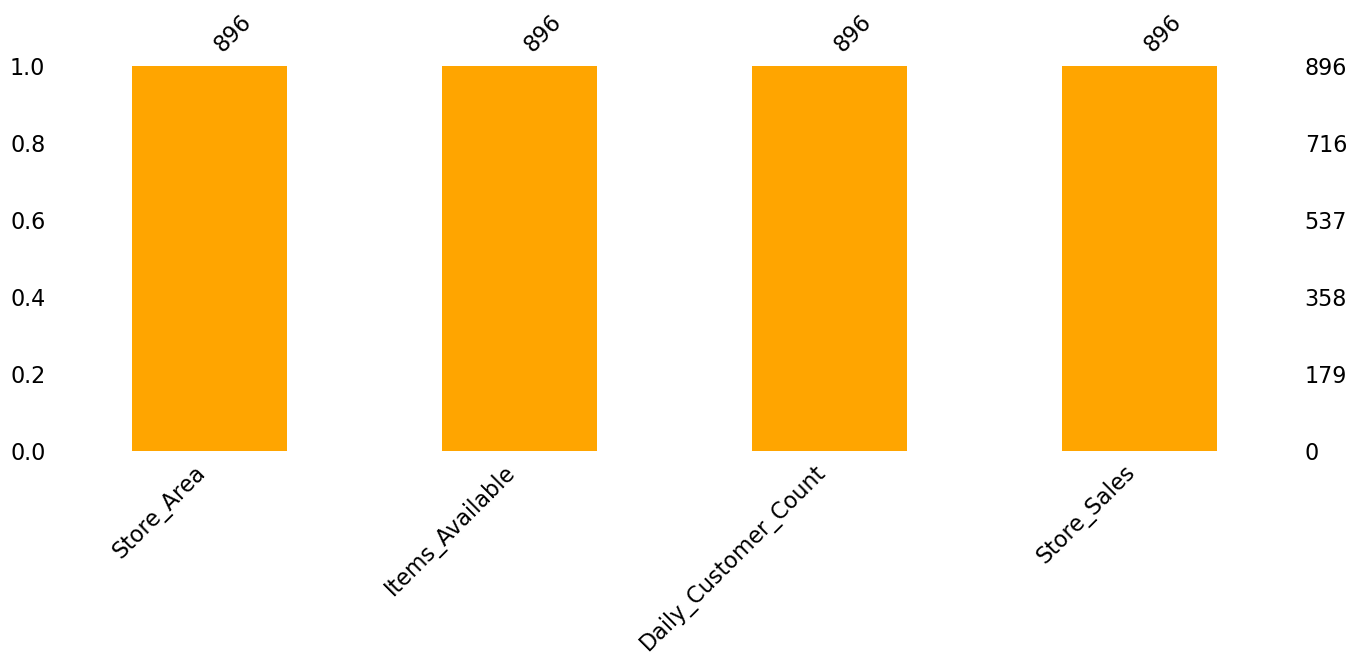

In [13]:
msno.bar(train, figsize = (16,5),color = "orange")
plt.show()

In [15]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'Store_Area' has '583' unique values
Feature 'Items_Available' has '616' unique values
Feature 'Daily_Customer_Count' has '130' unique values
Feature 'Store_Sales' has '816' unique values


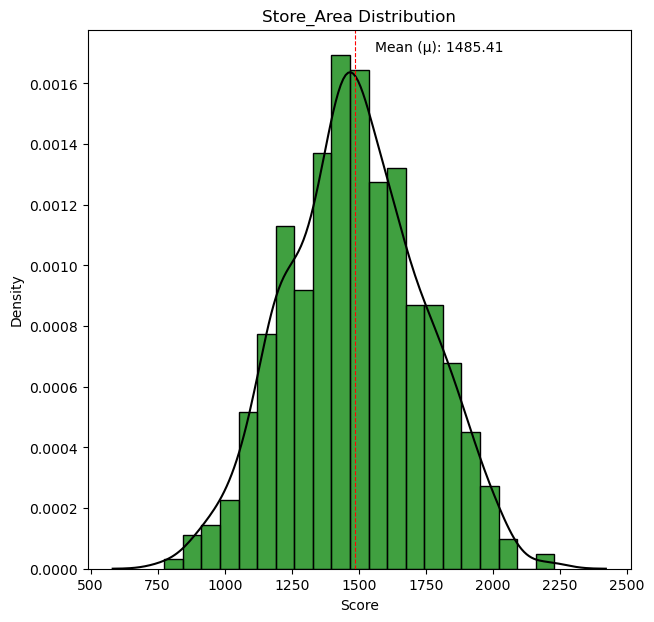

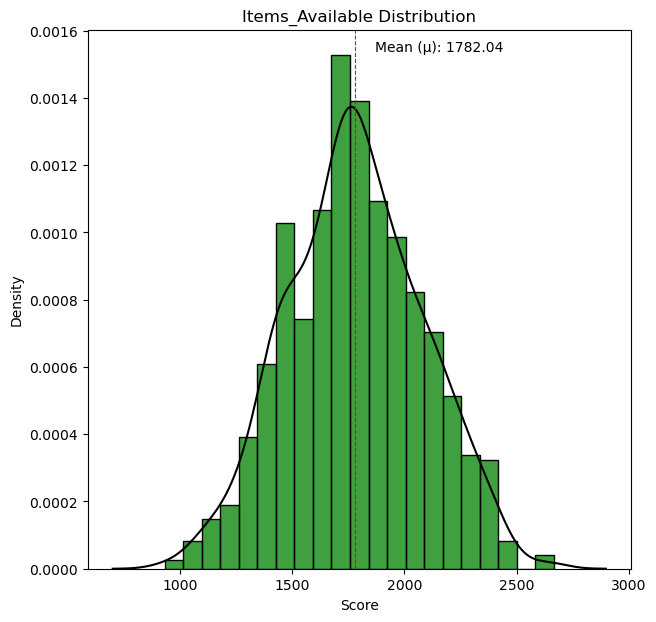

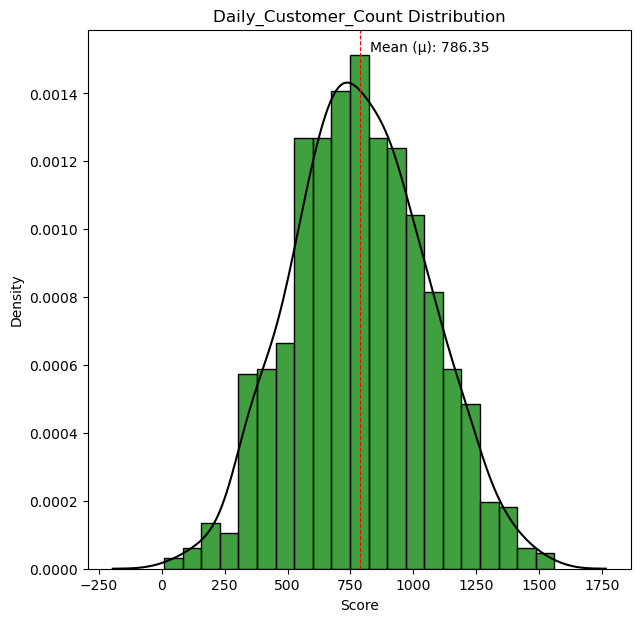

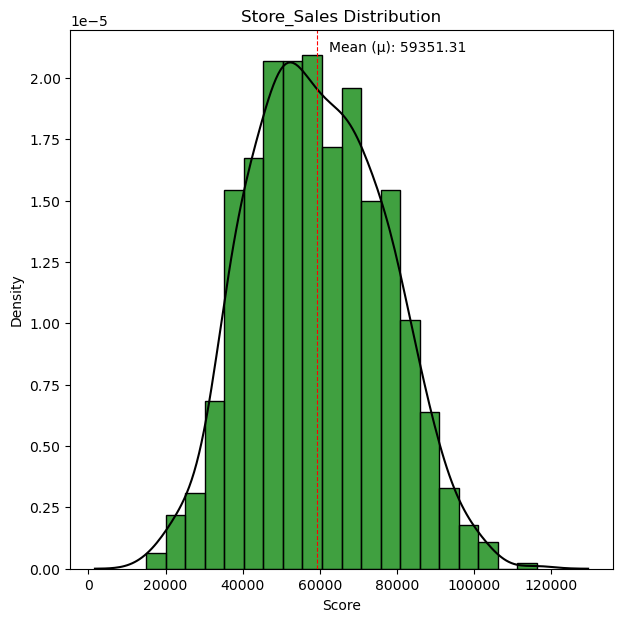

In [17]:
for column_name in train.columns:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(train[column_name], stat='density',color='green')
  sns.kdeplot(train[column_name], color='black')
  plt.axvline(train[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(train[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(train[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

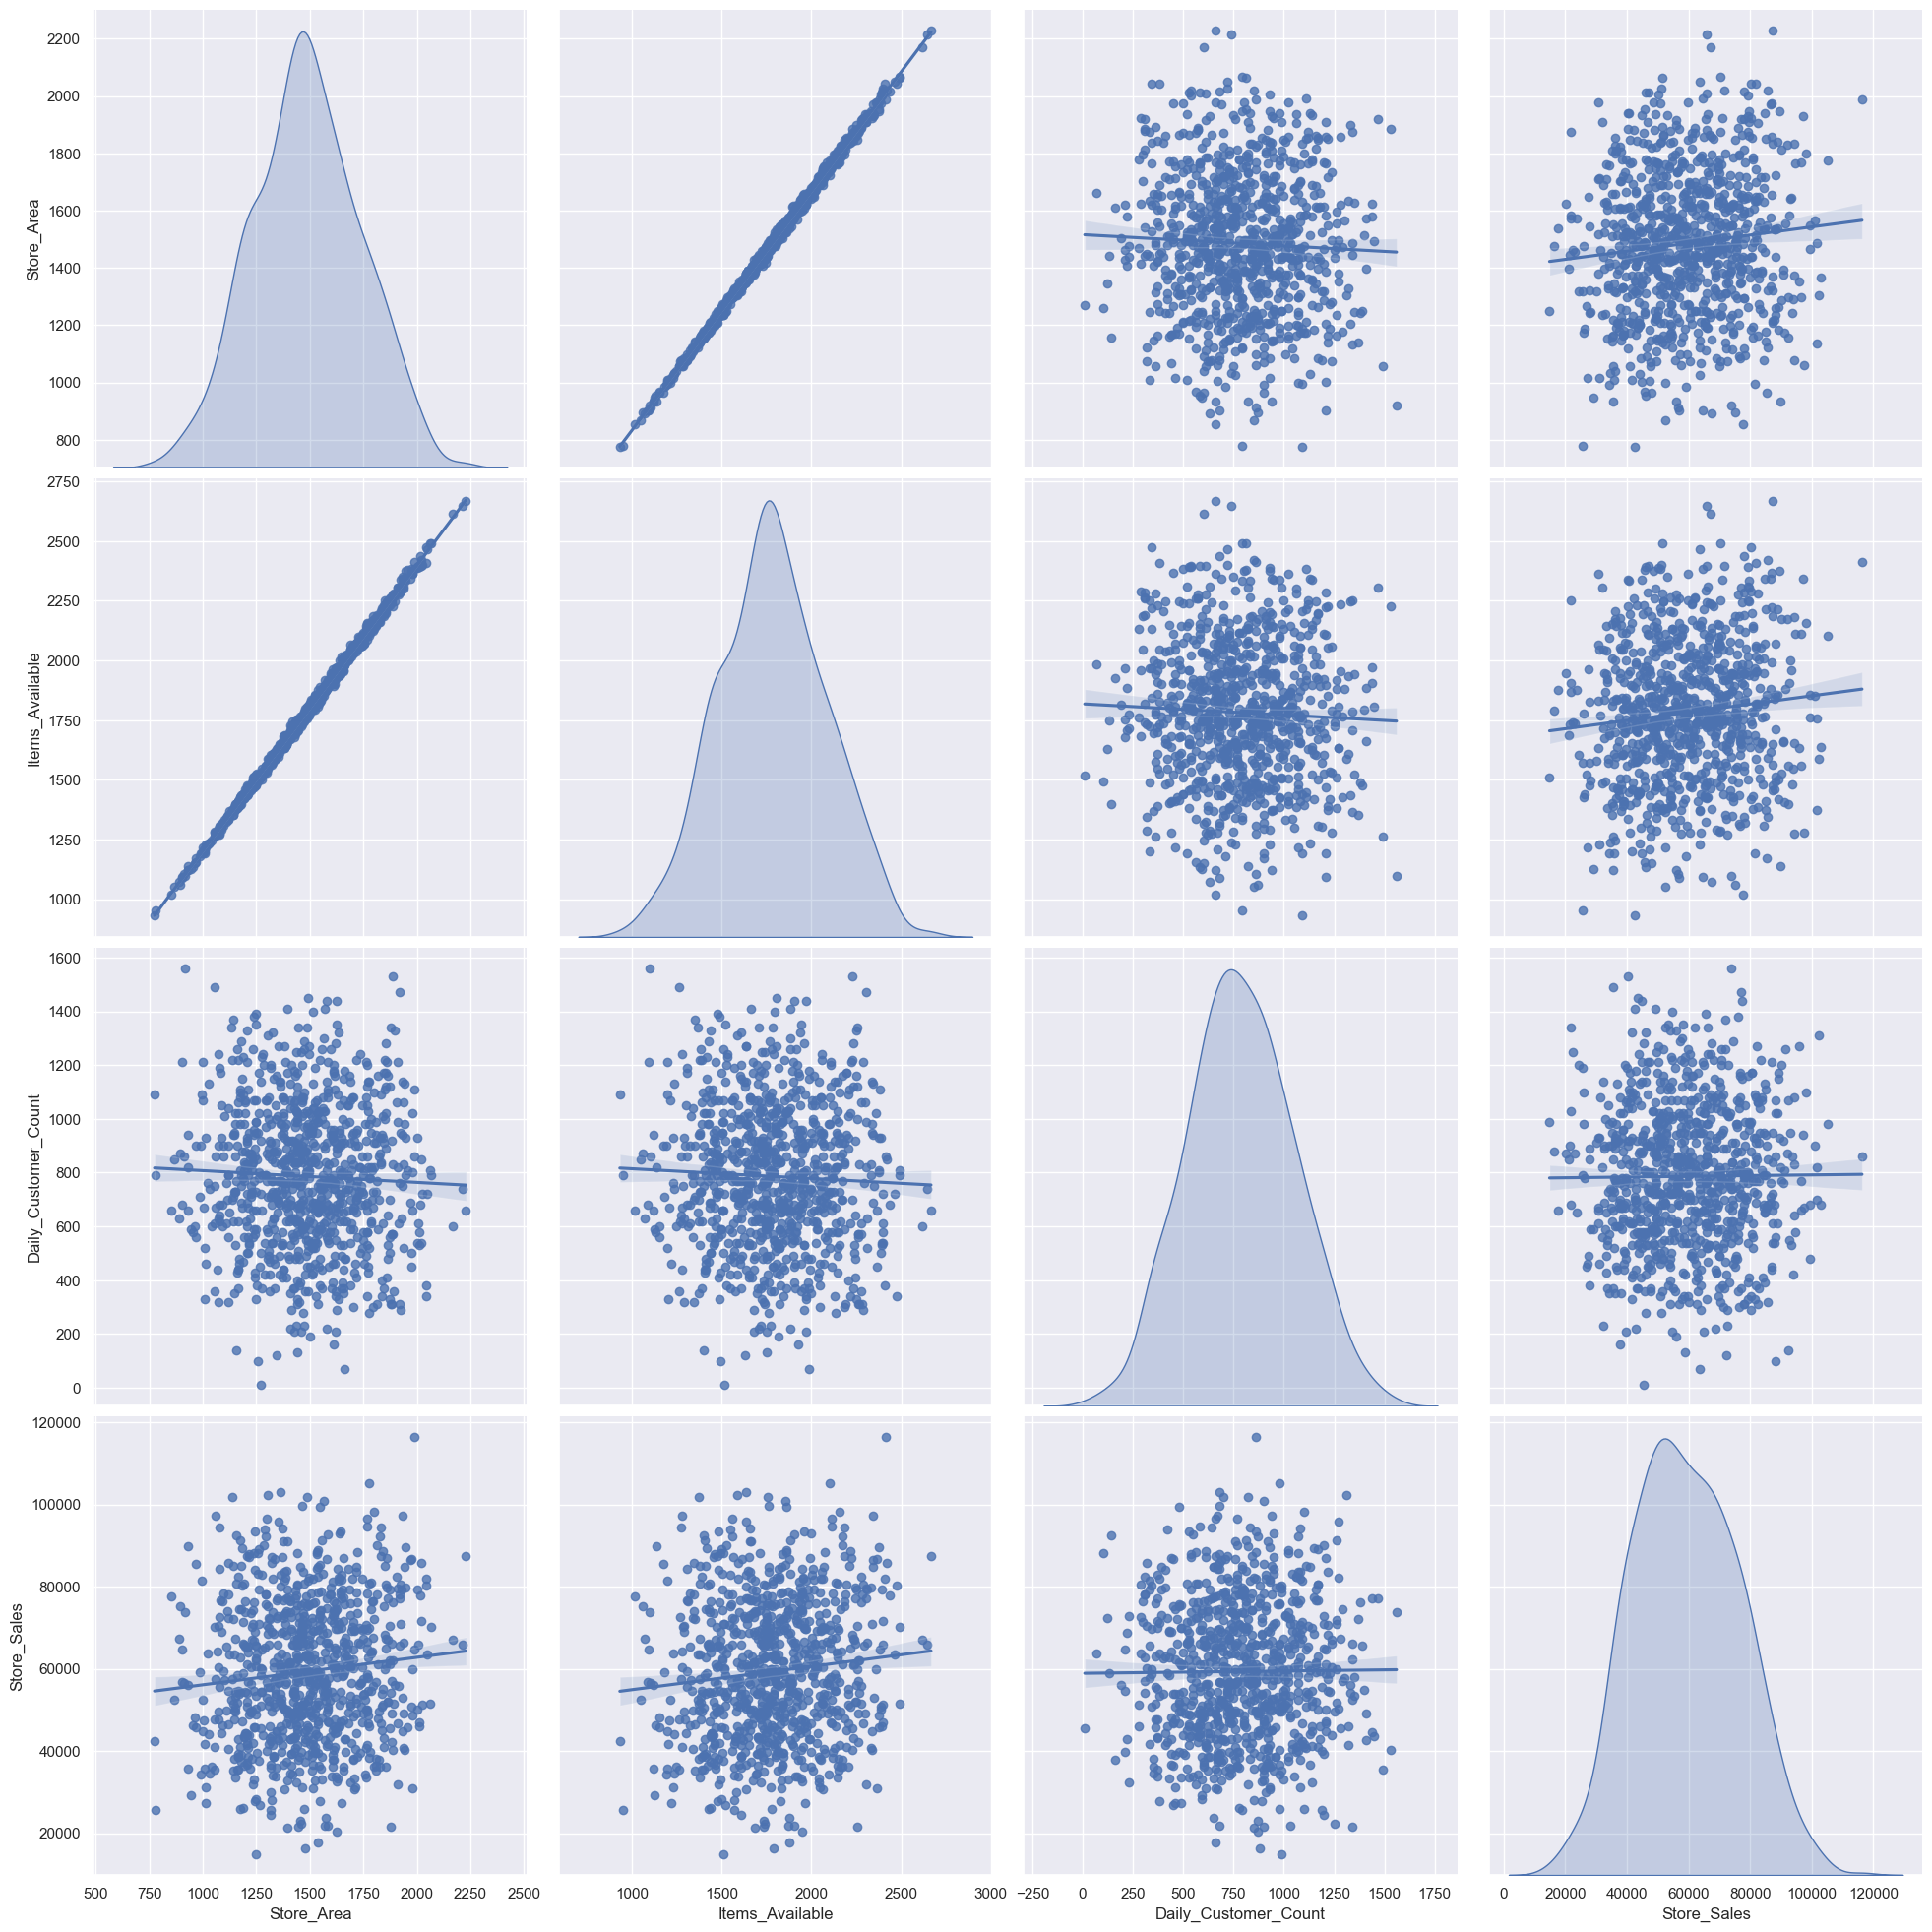

In [21]:
sns.set()
sns.pairplot(train,height = 5 ,kind ='reg',diag_kind='kde')
plt.show()

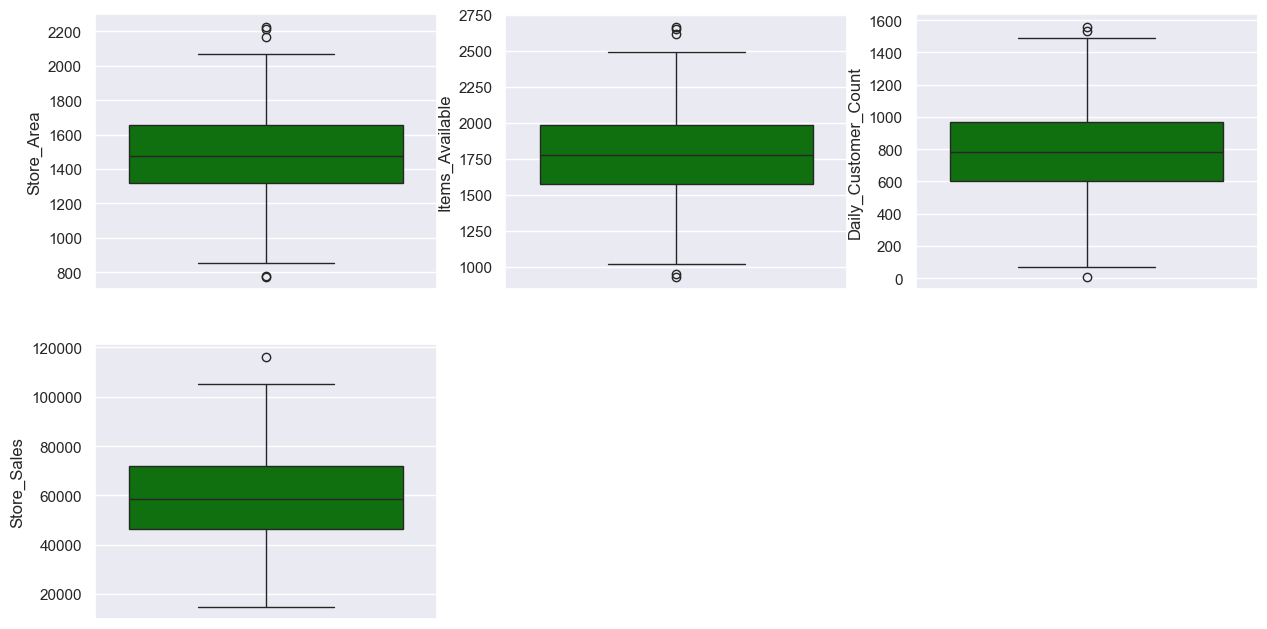

In [23]:
i=1
plt.figure(figsize=(15,25))
for feature in train.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature],color='green')
    i+=1

In [25]:
correlation = train.corr()
print(correlation['Store_Sales'].sort_values(ascending = False),'\n')

Store_Sales             1.000000
Items_Available         0.098849
Store_Area              0.097474
Daily_Customer_Count    0.008629
Name: Store_Sales, dtype: float64 



Index(['Store_Sales', 'Items_Available', 'Store_Area', 'Daily_Customer_Count'], dtype='object')


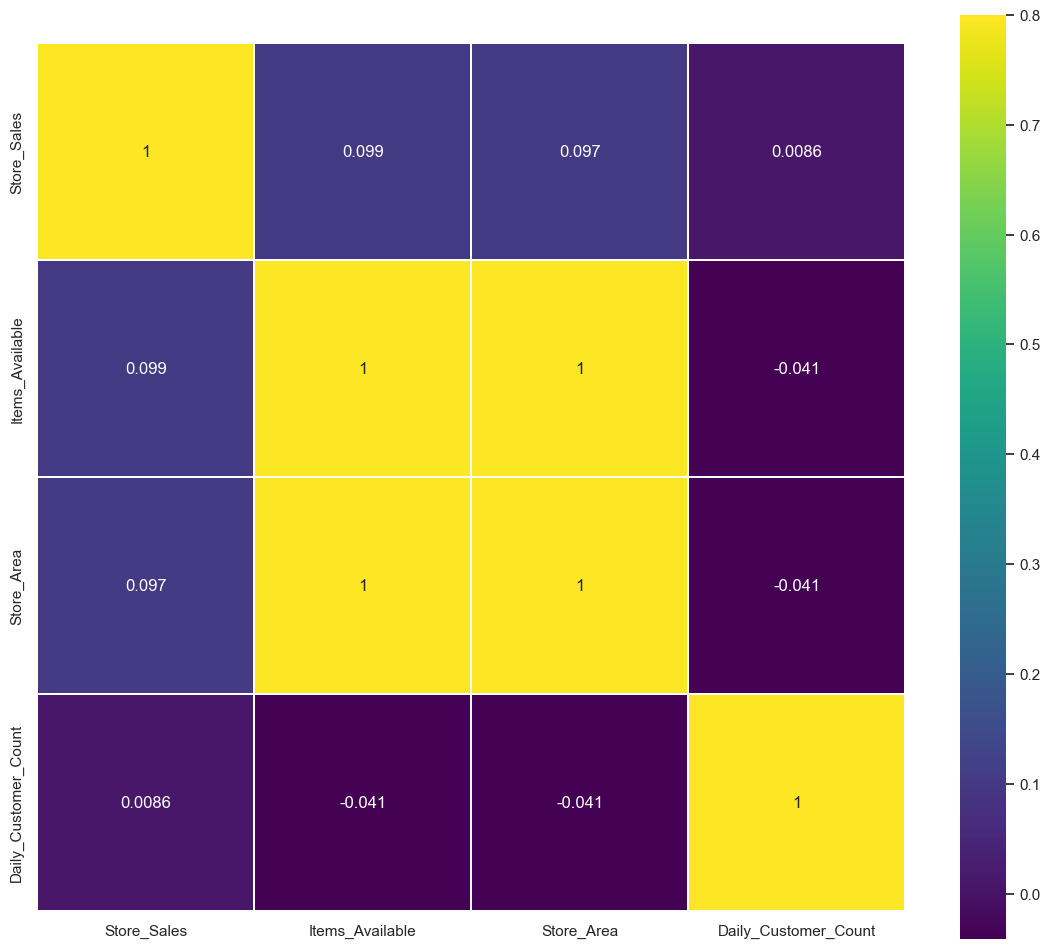

In [27]:
k= 10
cols = correlation.nlargest(k,'Store_Sales')['Store_Sales'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

In [29]:
train=train.drop('Store_Area',axis=1)

In [31]:
train

,Items_Available,Daily_Customer_Count,Store_Sales
0,1961,530,66490
1,1752,210,39820
2,1609,720,54010
3,1748,620,53730
4,2111,450,46620
...,...,...,...
891,1910,1080,66390
892,1663,850,82080
893,1436,1060,76440
894,1560,770,96610


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

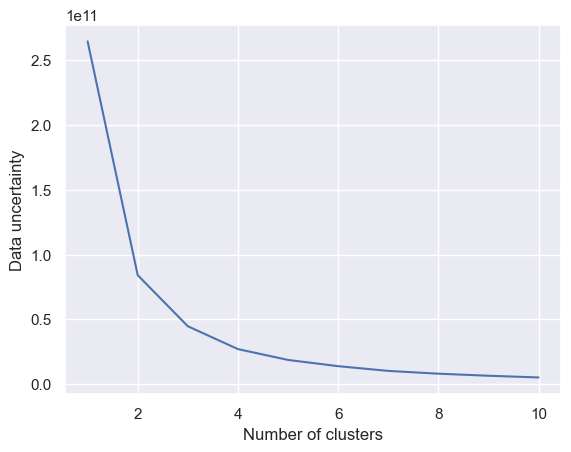

In [33]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(train)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()

In [35]:
from sklearn.neighbors import LocalOutlierFactor

In [37]:
clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
y_pred = clf.fit_predict(train)

In [39]:
train['Out']=y_pred

In [41]:
Out=train[train['Out']!=1]

In [43]:
Out.shape

(20, 4)

In [45]:
train2=train[train['Out']==1]

In [47]:
train2

,Items_Available,Daily_Customer_Count,Store_Sales,Out
0,1961,530,66490,1
1,1752,210,39820,1
2,1609,720,54010,1
3,1748,620,53730,1
4,2111,450,46620,1
...,...,...,...,...
891,1910,1080,66390,1
892,1663,850,82080,1
893,1436,1060,76440,1
894,1560,770,96610,1


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [ ]:
pip install xgboost

In [ ]:
y=train2['Store_Sales']
X=train2.drop(['Store_Sales','Out'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import numpy as np

# Example dataset (Replace with your actual dataset)
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.rand(100)  # 100 target values

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = [
    RandomForestRegressor(),
    LinearRegression(),
    ElasticNet(),
    KNeighborsRegressor(),
    xgb.XGBRegressor()
]

# Train and evaluate models
for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'Model: {m.__class__.__name__}')
    print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')  # Root Mean Squared Error
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print('-' * 30, '\n')


Model: RandomForestRegressor
RMSE: 0.3955686428250903
MAE: 0.3550920650423103
------------------------------ 

Model: LinearRegression
RMSE: 0.35203465547983964
MAE: 0.3164633952694884
------------------------------ 

Model: ElasticNet
RMSE: 0.2930214420280082
MAE: 0.2443805836838493
------------------------------ 

Model: KNeighborsRegressor
RMSE: 0.3309814860611836
MAE: 0.28525909490997775
------------------------------ 



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the func

Model: XGBRegressor
RMSE: 0.3537110023036242
MAE: 0.30579216513603946
------------------------------ 



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
